In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import seaborn as sns  
sns.set(color_codes = True)
sns.set(style="whitegrid")
import plotly.figure_factory as ff
from plotly.colors import n_colors

In [3]:
df = pd.read_csv('country_vaccinations.csv')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62363 entries, 0 to 62362
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              62363 non-null  object 
 1   iso_code                             62363 non-null  object 
 2   date                                 62363 non-null  object 
 3   total_vaccinations                   33533 non-null  float64
 4   people_vaccinated                    31902 non-null  float64
 5   people_fully_vaccinated              29106 non-null  float64
 6   daily_vaccinations_raw               27465 non-null  float64
 7   daily_vaccinations                   62031 non-null  float64
 8   total_vaccinations_per_hundred       33533 non-null  float64
 9   people_vaccinated_per_hundred        31902 non-null  float64
 10  people_fully_vaccinated_per_hundred  29106 non-null  float64
 11  daily_vaccinations_per_milli

In [5]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     28830
people_vaccinated                      30461
people_fully_vaccinated                33257
daily_vaccinations_raw                 34898
daily_vaccinations                       332
total_vaccinations_per_hundred         28830
people_vaccinated_per_hundred          30461
people_fully_vaccinated_per_hundred    33257
daily_vaccinations_per_million           332
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [6]:
df.fillna(value = 0, inplace = True)
df.total_vaccinations = df.total_vaccinations.astype(int)
df.people_vaccinated = df.people_vaccinated.astype(int)
df.people_fully_vaccinated = df.people_fully_vaccinated.astype(int)
df.daily_vaccinations_raw = df.daily_vaccinations_raw.astype(int)
df.daily_vaccinations = df.daily_vaccinations.astype(int)
df.total_vaccinations_per_hundred = df.total_vaccinations_per_hundred.astype(int)
df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.astype(int)
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.astype(int)
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.astype(int)
date = df.date.str.split('-', expand =True)
date

,0,1,2
0,2021,02,22
1,2021,02,23
2,2021,02,24
3,2021,02,25
4,2021,02,26
...,...,...,...
62358,2021,12,01
62359,2021,12,02
62360,2021,12,03
62361,2021,12,04


In [7]:
df['year'] = date[0]
df['month'] = date[1]
df['day'] = date[2]
df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)
df.date = pd.to_datetime(df.date)
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
0,Afghanistan,AFG,2021-02-22,0,0,0,0,0,0,0,0,0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...,2021,2,22
1,Afghanistan,AFG,2021-02-23,0,0,0,0,1367,0,0,0,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...,2021,2,23
2,Afghanistan,AFG,2021-02-24,0,0,0,0,1367,0,0,0,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...,2021,2,24
3,Afghanistan,AFG,2021-02-25,0,0,0,0,1367,0,0,0,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...,2021,2,25
4,Afghanistan,AFG,2021-02-26,0,0,0,0,1367,0,0,0,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...,2021,2,26


In [8]:
print('Data point starts from ',df.date.min(),'n')
print('Data point ends at ',df.date.max(),'n')
print('Total no of countries in the data set ',len(df.country.unique()),'n')
print('Total no of unique vaccines in the data set ',len(df.vaccines.unique()),'n')

Data point starts from  2020-12-01 00:00:00 n
Data point ends at  2021-12-06 00:00:00 n
Total no of countries in the data set  223 n
Total no of unique vaccines in the data set  77 n


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62363 entries, 0 to 62362
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              62363 non-null  object        
 1   iso_code                             62363 non-null  object        
 2   date                                 62363 non-null  datetime64[ns]
 3   total_vaccinations                   62363 non-null  int64         
 4   people_vaccinated                    62363 non-null  int64         
 5   people_fully_vaccinated              62363 non-null  int64         
 6   daily_vaccinations_raw               62363 non-null  int64         
 7   daily_vaccinations                   62363 non-null  int64         
 8   total_vaccinations_per_hundred       62363 non-null  int64         
 9   people_vaccinated_per_hundred        62363 non-null  int64         
 10  people_ful

In [10]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,year,month,day
count,6.236300e+04,6.236300e+04,6.236300e+04,6.236300e+04,6.236300e+04,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000
mean,1.640894e+07,6.415025e+06,4.139851e+06,1.165425e+05,1.324261e+05,31.402370,16.909498,12.409249,3450.313118,2020.994500,6.764091,15.790950
std,1.185515e+08,3.584147e+07,2.329645e+07,8.342678e+05,8.137084e+05,49.077754,25.526460,21.798628,4146.399049,0.073959,2.894340,8.856118
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,1.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.580000e+02,0.000000,0.000000,0.000000,631.000000,2021.000000,4.000000,8.000000
50%,3.446200e+04,4.905000e+03,0.000000e+00,0.000000e+00,7.277000e+03,0.000000,0.000000,0.000000,2233.000000,2021.000000,7.000000,16.000000
75%,2.937171e+06,1.638335e+06,8.227170e+05,1.742600e+04,4.213250e+04,50.000000,30.000000,15.000000,5022.000000,2021.000000,9.000000,23.000000
max,2.560117e+09,1.225000e+09,1.110506e+09,2.474100e+07,2.242429e+07,297.000000,121.000000,118.000000,117497.000000,2021.000000,12.000000,31.000000


In [11]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Isl

In [12]:
def size(m,n):
    fig = plt.gcf();
    fig.set_size_inches(m,n);

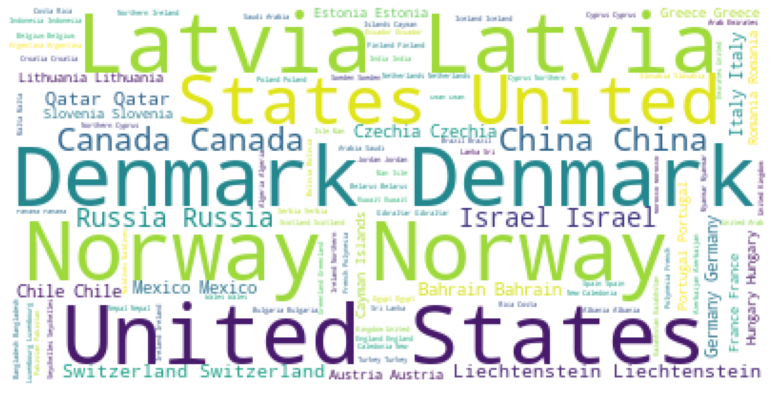

In [13]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df.country))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

In [14]:
country_wise_total_vaccinated = {}
for country in df.country.unique() : 
    vaccinated = 0
    for i in range(len(df)) : 
        if df.country[i] == country : 
            vaccinated += df.daily_vaccinations[i]
    country_wise_total_vaccinated[country] = vaccinated 
#     made a seperate dict from the df 
    country_wise_total_vaccinated_df = pd.DataFrame.from_dict(country_wise_total_vaccinated,
                                                         orient='index',
                                                         columns = ['total_vaccinted_till_date'])
#     converted dict to df 
country_wise_total_vaccinated_df.sort_values(by = 'total_vaccinted_till_date', ascending = False, inplace = True)
country_wise_total_vaccinated_df

,total_vaccinted_till_date
China,2533074783
India,1262824352
United States,469918990
Brazil,313008441
Indonesia,239717081
...,...
Montserrat,3053
Niue,2484
Burundi,2247
Tokelau,1966


In [15]:
fig = px.bar(country_wise_total_vaccinated_df, 
             y = 'total_vaccinted_till_date',
             x = country_wise_total_vaccinated_df.index,
             color = 'total_vaccinted_till_date',
             color_discrete_sequence= px.colors.sequential.Viridis_r
            )
fig.update_layout(
    title={
            'text' : "Vaccination till date in various countries",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Countries",
    yaxis_title="Total vaccinated",
    legend_title="Total vaccinated"
)
fig.show()

ValueError: ignored

In [16]:
fig = px.line(df, x = 'date', y ='daily_vaccinations', color = 'country')
fig.update_layout(
    title={
            'text' : "Daily vaccination trend",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations"
)
fig.show()

In [17]:
# helper function
def plot_till_date(value1, value2, title, color1, color2) : 
    so_far_dict = {}
    for dates in df.date.unique() : 
        so_far_dict[dates], value1_count, value2_count = [], 0, 0
        for i in range(len(df)) : 
            if df.date[i] == dates : 
                value1_count += df[value1][i]
                value2_count += df[value2][i]
#         if dates not in so_far_dict.keys() : 
        so_far_dict[dates].append(value1_count) 
        so_far_dict[dates].append(value2_count)
    so_far_df = pd.DataFrame.from_dict(so_far_dict, orient = 'index', columns=[value1, value2])
    so_far_df.reset_index(inplace = True)
#     return so_far_df
    so_far_df.sort_values(by='index', inplace = True)
    plot = go.Figure(data=[go.Scatter( 
            x = so_far_df['index'], 
            y = so_far_df[value1], 
            stackgroup='one', 
            name = value1, 
            marker_color= color1), 
                           go.Scatter( 
            x = so_far_df['index'], 
            y = so_far_df[value2], 
            stackgroup='one',
            name = value2, 
            marker_color= color2) 
        ]) 
    plot.update_layout(
    title={
            'text' : title,
            'y':0.95,
            'x':0.5
        },
        xaxis_title="Date"
    )
    return plot.show()

In [18]:
plot_till_date('people_fully_vaccinated', 'people_vaccinated','People vaccinated vs Fully vaccinated till date', '#c4eb28', '#35eb28')

In [19]:
plot_till_date('people_fully_vaccinated_per_hundred', 'people_vaccinated_per_hundred', 'People vaccinated vs Fully vaccinated per hundred till date', '#0938e3','#7127cc')

In [30]:
def plot_pie(value, title, color) : 
    new_dict = {}
    for v in df[value].unique() : 
        value_count = 0
        for i in range(len(df)) : 
            if df[value][i] == v : 
                value_count += 1 
        new_dict[v] = value_count 
#     print(new_dict)
    new_df = pd.DataFrame.from_dict(new_dict, orient = 'index', columns = ['Total'])
    if color == 'plasma' : 
        fig = px.pie(new_df, values= 'Total',
                     names = new_df.index,
                     title = title,
                     color_discrete_sequence=px.colors.sequential.Plasma)
    elif color == 'rainbow' : 
        fig = px.pie(new_df, values= 'Total',
                     names = new_df.index,
                     title = title,
                     color_discrete_sequence=px.colors.sequential.Rainbow)
    else :
        fig = px.pie(new_df, values= 'Total',
                     names = new_df.index,
                     title = title)
    fig.update_layout(
        title={
            'y':0.95,
            'x':0.5
        },
        legend_title = value
    )
    return fig.show()
    plot_pie('vaccines', 'Various vaccines and their uses', 'plasma')

In [31]:
df.vaccines.unique()

array(['Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca', 'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V',
       'CanSino, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Moderna, Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V',
       'Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing',
       'Sinopharm/Beijing, Sputnik V',
       'Johnson&Jo

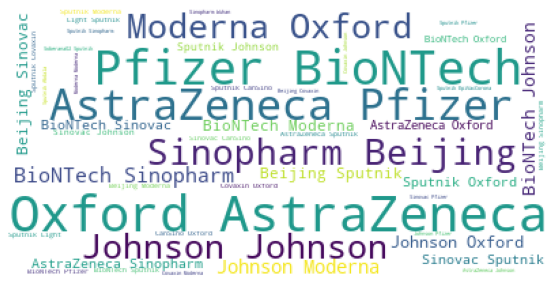

In [32]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df.vaccines))
plt.figure(figsize=(12,5))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

In [28]:
india_usa = [df[df.country == 'United States'], df[df.country == 'India']]
result = pd.concat(india_usa)
fig = px.line(result, x = 'date', y ='total_vaccinations', color = 'country')
fig.update_layout(
    title={
            'text' : "Total vaccinated - India vs USA",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Total Vaccinations"
)
fig.show()